In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('basket.csv')

In [3]:
basket_df = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().fillna(0)
basket_df = basket_df.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\dalea\AppData\Local\Temp\ipykernel_5488\1672825488.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_df = basket_df.applymap(lambda x: 1 if x > 0 else 0)


In [4]:
min_support = 0.02
min_confidence = 0.3
n_transactions = len(basket_df)

In [5]:
supports = {}
frequent_itemsets = []

for item in basket_df.columns:
    support = basket_df[item].sum() / n_transactions
    if support >= min_support:
        itemset = frozenset([item])
        supports[itemset] = support
        frequent_itemsets.append({'itemsets': itemset, 'support': support})

In [6]:
freq1 = list(supports.keys())
for combo in itertools.combinations(freq1, 2):
    itemset = combo[0].union(combo[1])
    support = basket_df[list(itemset)].all(axis=1).sum() / n_transactions
    if support >= min_support:
        supports[itemset] = support
        frequent_itemsets.append({'itemsets': itemset, 'support': support})

In [7]:
fi_df = pd.DataFrame(frequent_itemsets)

In [8]:
rules = []
for itemset in fi_df['itemsets']:
    if len(itemset) > 1:
        for r in range(1, len(itemset)):
            for antecedent in itertools.combinations(itemset, r):
                antecedent = frozenset(antecedent)
                consequent = itemset - antecedent
                if antecedent in supports:
                    confidence = supports[itemset] / supports[antecedent]
                    if confidence >= min_confidence:
                        rules.append({
                            'antecedents': antecedent,
                            'consequents': consequent,
                            'support': supports[itemset],
                            'confidence': confidence
                        })
rules_df = pd.DataFrame(rules)

In [9]:
print("Dataset shape:", basket_df.shape)
print("\nFirst 5 frequent itemsets:\n", fi_df.head())
print("\nFirst 5 association rules:\n", rules_df.head())

Dataset shape: (9465, 94)

First 5 frequent itemsets:
       itemsets   support
0  (Alfajores)  0.036344
1      (Bread)  0.327205
2    (Brownie)  0.040042
3       (Cake)  0.103856
4     (Coffee)  0.478394

First 5 association rules:
        antecedents consequents   support  confidence
0         (Pastry)     (Bread)  0.029160    0.338650
1           (Cake)    (Coffee)  0.054728    0.526958
2        (Cookies)    (Coffee)  0.028209    0.518447
3  (Hot chocolate)    (Coffee)  0.029583    0.507246
4          (Juice)    (Coffee)  0.020602    0.534247


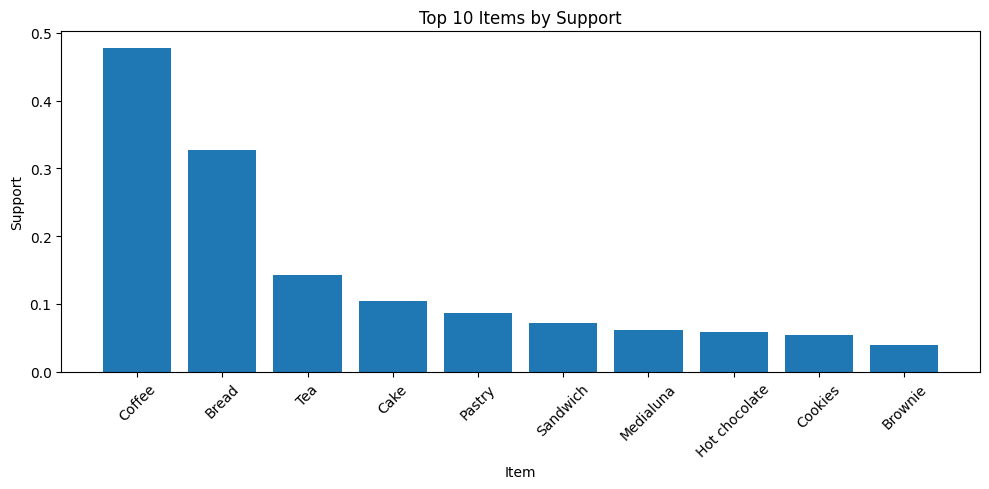

In [10]:
item_support = fi_df[fi_df['itemsets'].apply(lambda x: len(x) == 1)].copy()
item_support['item'] = item_support['itemsets'].apply(lambda x: list(x)[0])
top_items = item_support.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_items['item'], top_items['support'])
plt.xlabel('Item')
plt.ylabel('Support')
plt.title('Top 10 Items by Support')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()